# **Data Visualization - IBM Data Analyst Professional Certificate**


<hr>


## How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-05-16 13:09:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.3’

m4_survey_data.sqli 100%[===================>]  34.98M  28.6MB/s    in 1.2s    

2023-05-16 13:09:31 (28.6 MB/s) - ‘m4_survey_data.sqlite.3’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Data Visualization


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [15]:
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.drop(columns=df.columns[0], axis=1,  inplace=True)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",None,...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Text(0, 0.5, 'Number of Respondents')

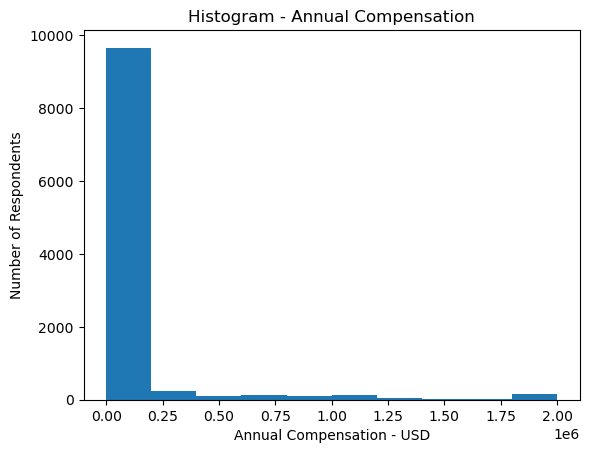

In [21]:
QUERY = """
SELECT ConvertedComp 
FROM master
"""

df['ConvertedComp'].plot(kind = 'hist')
plt.title('Histogram - Annual Compensation')
plt.xlabel('Annual Compensation - USD')
plt.ylabel('Number of Respondents')

### Box Plots


Plot a box plot of `Age.`


Text(0.5, 1.0, 'Age Boxplot')

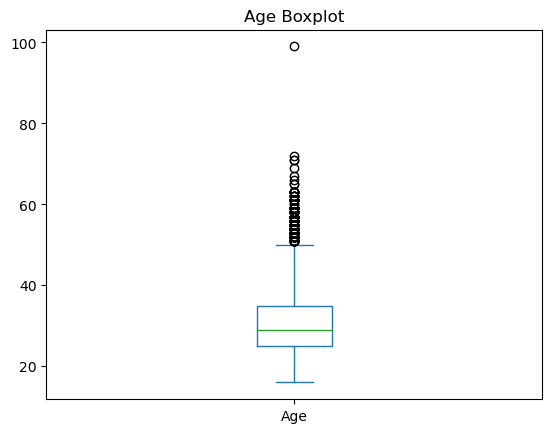

In [22]:
QUERY = """
SELECT Age 
FROM master
"""

df['Age'].plot(kind='box')
plt.title('Age Boxplot')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


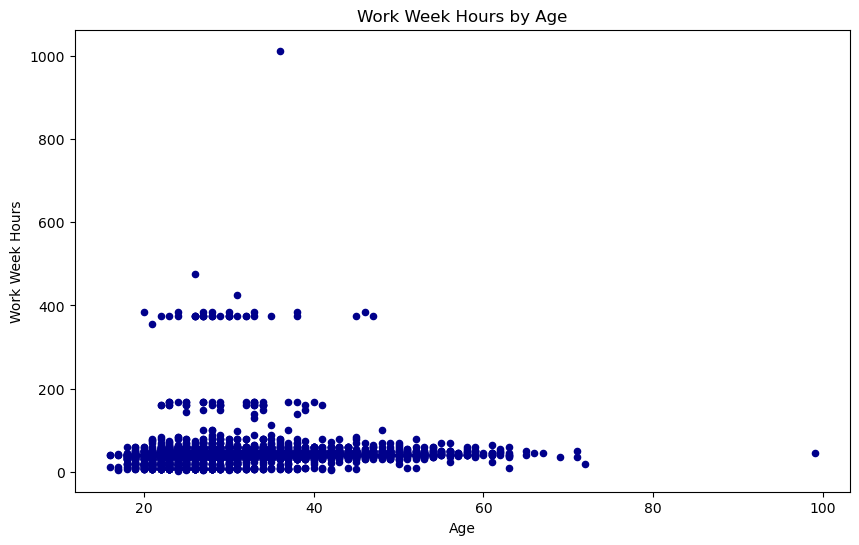

In [20]:
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""

df.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')

plt.title('Work Week Hours by Age')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


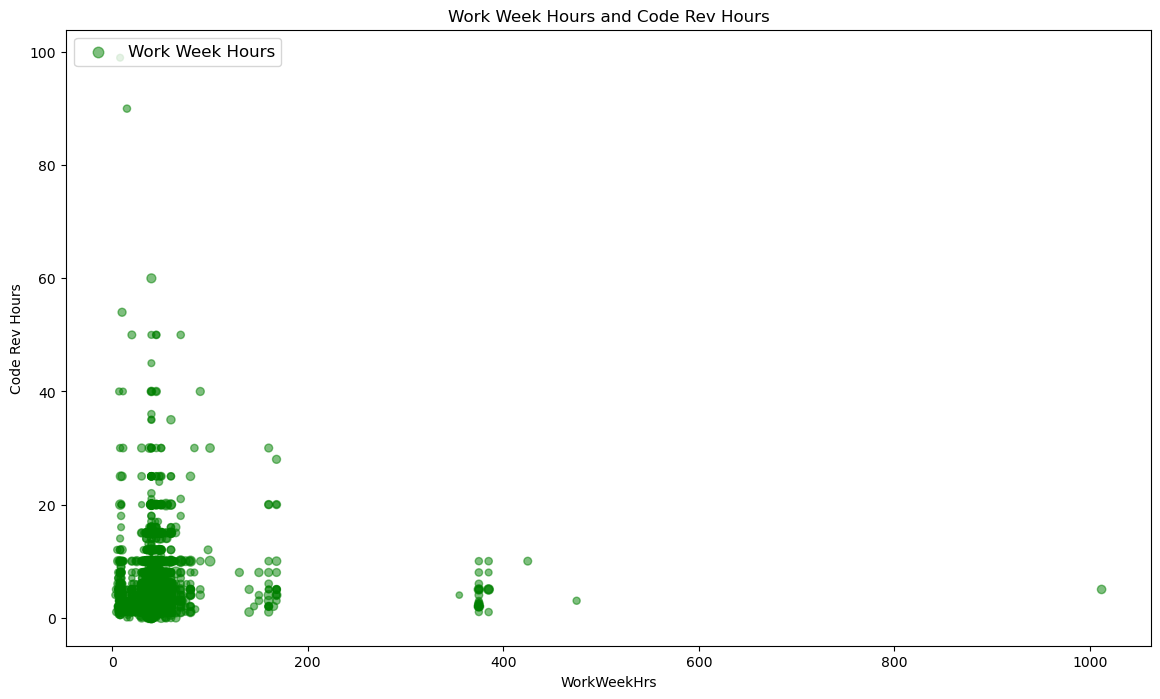

In [39]:
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
"""

#WorkWeekHrs
ax0 = df.plot(kind='scatter',
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    figsize=(14, 8),
                    alpha=0.5,
                    color='green',
                    s='Age' 
                    )

ax0.set_ylabel('Code Rev Hours')
ax0.set_title('Work Week Hours and Code Rev Hours')
ax0.legend(['Work Week Hours', 'Code Rev Hours'], loc='upper left', fontsize='large')


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [79]:
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""

df_t = pd.read_sql_query(QUERY,conn)
df_t.index_col=None
df_t.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


In [80]:
df_t_counts=(df_t['DatabaseDesireNextYear']).value_counts()
df_t_counts_5=df_t_counts.head(5)
df_t_counts_5

PostgreSQL       4328
MongoDB          3649
Redis            3331
MySQL            3281
Elasticsearch    2856
Name: DatabaseDesireNextYear, dtype: int64

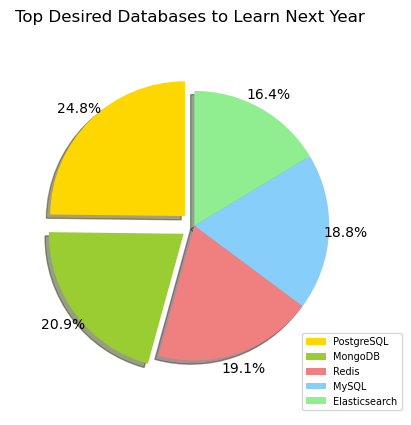

In [81]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.1, 0.1, 0, 0, 0] # ratio for each continent with which to offset each wedge.

# autopct create %, start angle represent starting point
df_t_counts_5.plot(kind='pie',
                    figsize=(4, 5),
                    autopct='%1.1f%%', # add in percentages
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,       # add shadow      
                    labels=None,         # turn off labels on pie chart
                    pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                    colors=colors_list,  # add custom colors
                    explode=explode_list # 'explode' lowest 3 continents
                    )

plt.title('Top Desired Databases to Learn Next Year')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_t_counts_5.index, loc='lower right',fontsize=7, bbox_to_anchor=(1.2, 0)) 
plt.ylabel(" ")

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [40]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age>=30 AND Age<=35
"""

df_sc = pd.read_sql_query(QUERY,conn)
df_sc = df_sc.groupby('Age').median()
df_sc.head()

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0


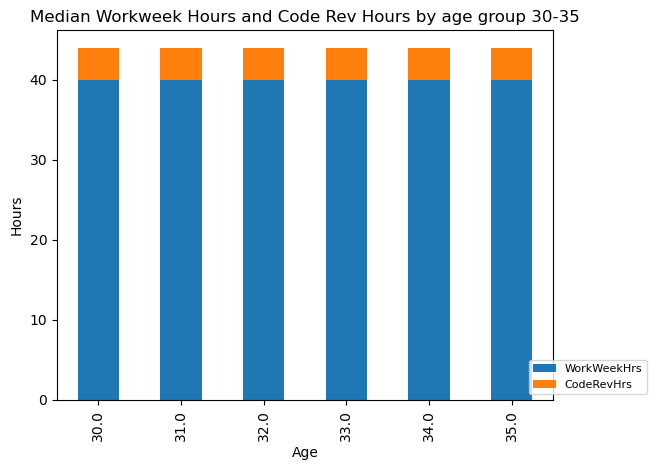

In [41]:

df_sc.plot(kind='bar',stacked=True)
plt.title('Median Workweek Hours and Code Rev Hours by age group 30-35')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.legend(loc='lower right',fontsize=8, bbox_to_anchor=(1.2, 0)) 
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [99]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""

df_lc = pd.read_sql_query(QUERY,conn)
df_lc = df_lc.groupby('Age')[['ConvertedComp']].median()
df_lc

,ConvertedComp
Age,
45.0,90330.0
46.0,91593.0
47.0,91606.0
48.0,105750.0
49.0,85248.0
50.0,95000.0
51.0,100000.0
52.0,105500.0
53.0,100463.0


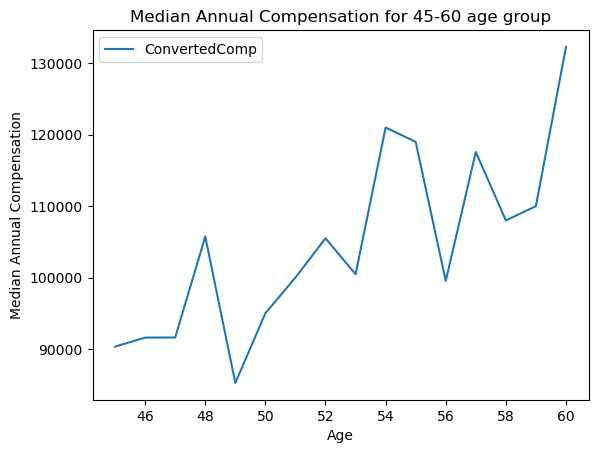

In [100]:
df_lc.plot.line()

plt.title('Median Annual Compensation for 45-60 age group')
plt.xlabel('Age')
plt.ylabel('Median Annual Compensation')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [87]:
QUERY = """
SELECT MainBranch, Count(*)
FROM master
GROUP BY MainBranch
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df_bch = pd.read_sql_query(QUERY,conn)
df_bch.head()

,MainBranch,Count(*)
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


In [88]:
df_bch.iloc[[0],[0]]="Developer by profession"
df_bch.iloc[[1],[0]]="Not primarly developer"
df_bch.head()

,MainBranch,Count(*)
0,Developer by profession,10618
1,Not primarly developer,780


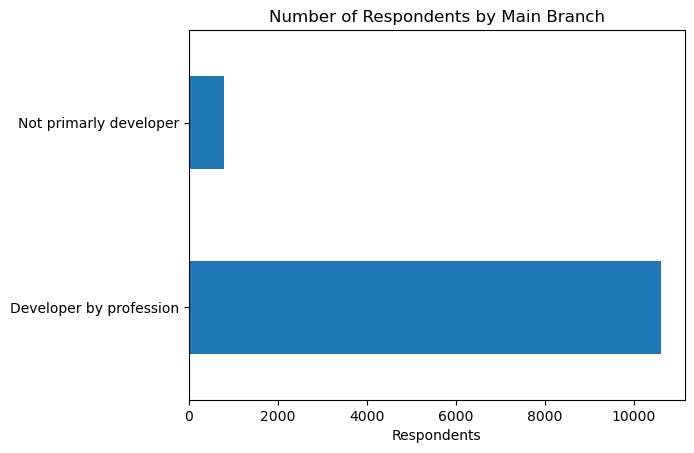

In [89]:
df_bch.plot.barh(x='MainBranch')
plt.title('Number of Respondents by Main Branch')

plt.xlabel('Respondents')
plt.ylabel('')
plt.legend().remove()

plt.show()


Close the database connection.


In [ ]:
conn.close

 Copyright © 2020 IBM Corporation.
